# Supervised Machine Learning - Classification Project

### Problem Statement:

In this project we will be working on a advertising dataset indicating whether a user has clicked on a company's advertisement or not. We will try to create a model that will predict if a user will click on the ad based on the given features using some classification models. The dataset that is being used for this project is from kaggle. Analyzing this data will help the Ad agency in getting an insight into the type of ads users are interested in. This would help them in providing better relative ads for the users. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [3]:
ad_data = pd.read_csv('advertising.csv')

### Checking the Data

In [4]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


### This Dataset contains the following features:
Daily Time spent on site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad

The above info also shows the number of columns, any missings values and also the data type. We can also see the avg age, avg Area Income, avg daily internet usage and other quartile ranges.

## Exploratory Data Analysis

### Let's explore the data using Seaborn:

In [34]:
## Correlation between the features.

corr=ad_data.corr()

/var/folders/1f/9bzs5h4x337cj79pqb2qslyr0000gn/T/ipykernel_23172/2176761512.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=ad_data.corr()


<Axes: >

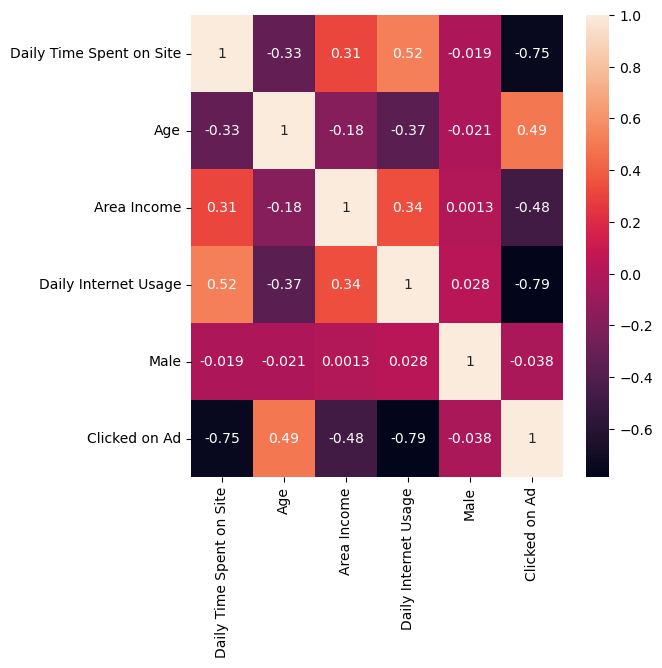

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(data=corr,annot=True)

Text(0.5, 0, 'Age')

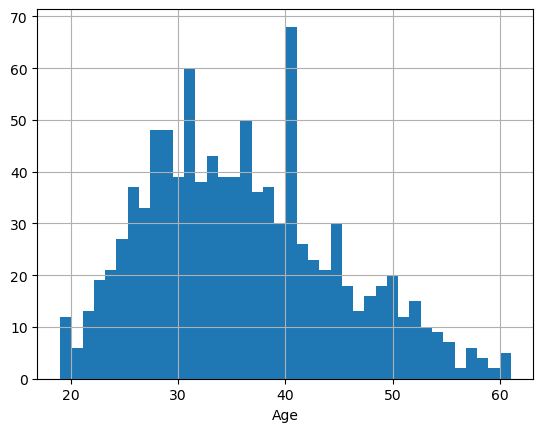

In [8]:
## Creating a histogram of Age 

sns.set_style()
ad_data['Age'].hist(bins = 40)
plt.xlabel('Age')


We see that most of the users are between the ages 25 and 45.

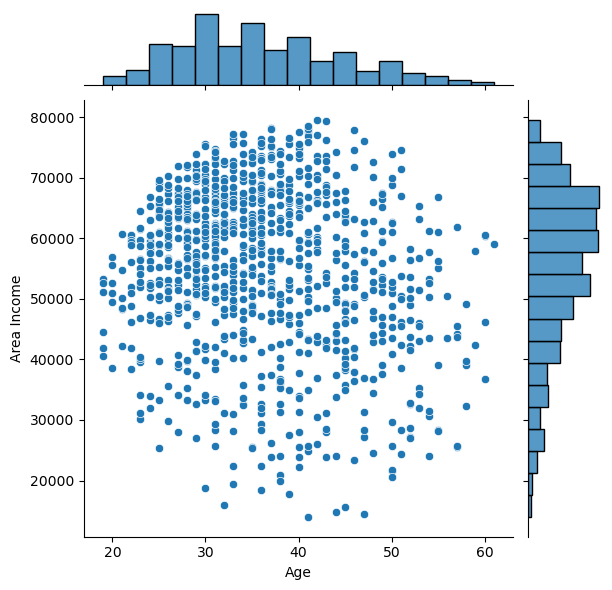

In [37]:
## Create a jointplot to show the Area Income vs Age

sns.jointplot(x='Age',y='Area Income', kind= 'scatter', data = ad_data)

We see that most people between the age of 25 and 35 belong to the area income between 50000 and 65000

### Create a jointplot showing the kde distributions of Daily Time Spent on site vs Age

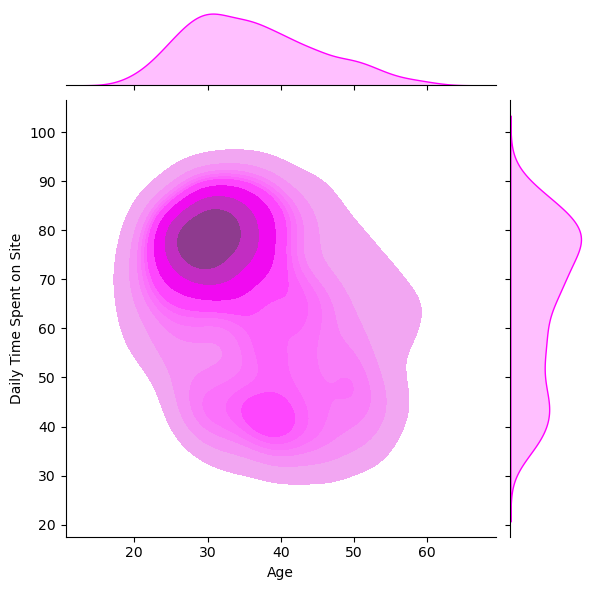

In [38]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=ad_data,color='magenta',fill=True,kind='kde')

We see that users between the ages 25 to 35 spending about 70 to 90 minutes on the site

### Jointplot for Daily Time Spent on Site vs Daily Internet Usage

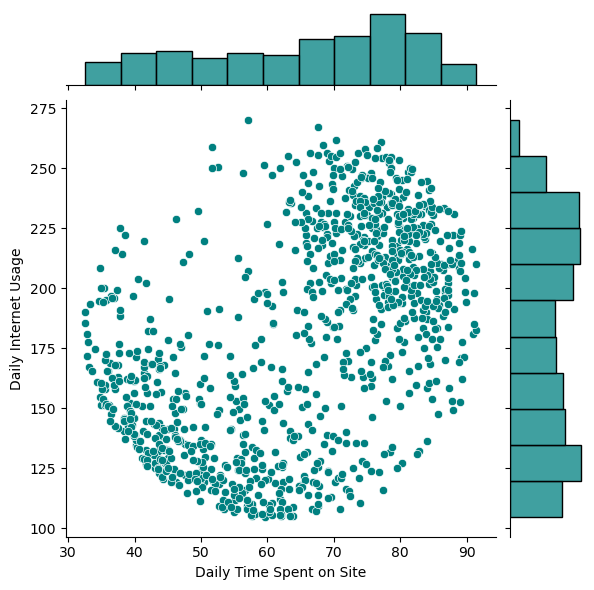

In [39]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='teal')

### Pairplot with hue set as 'Clicked on Ad'

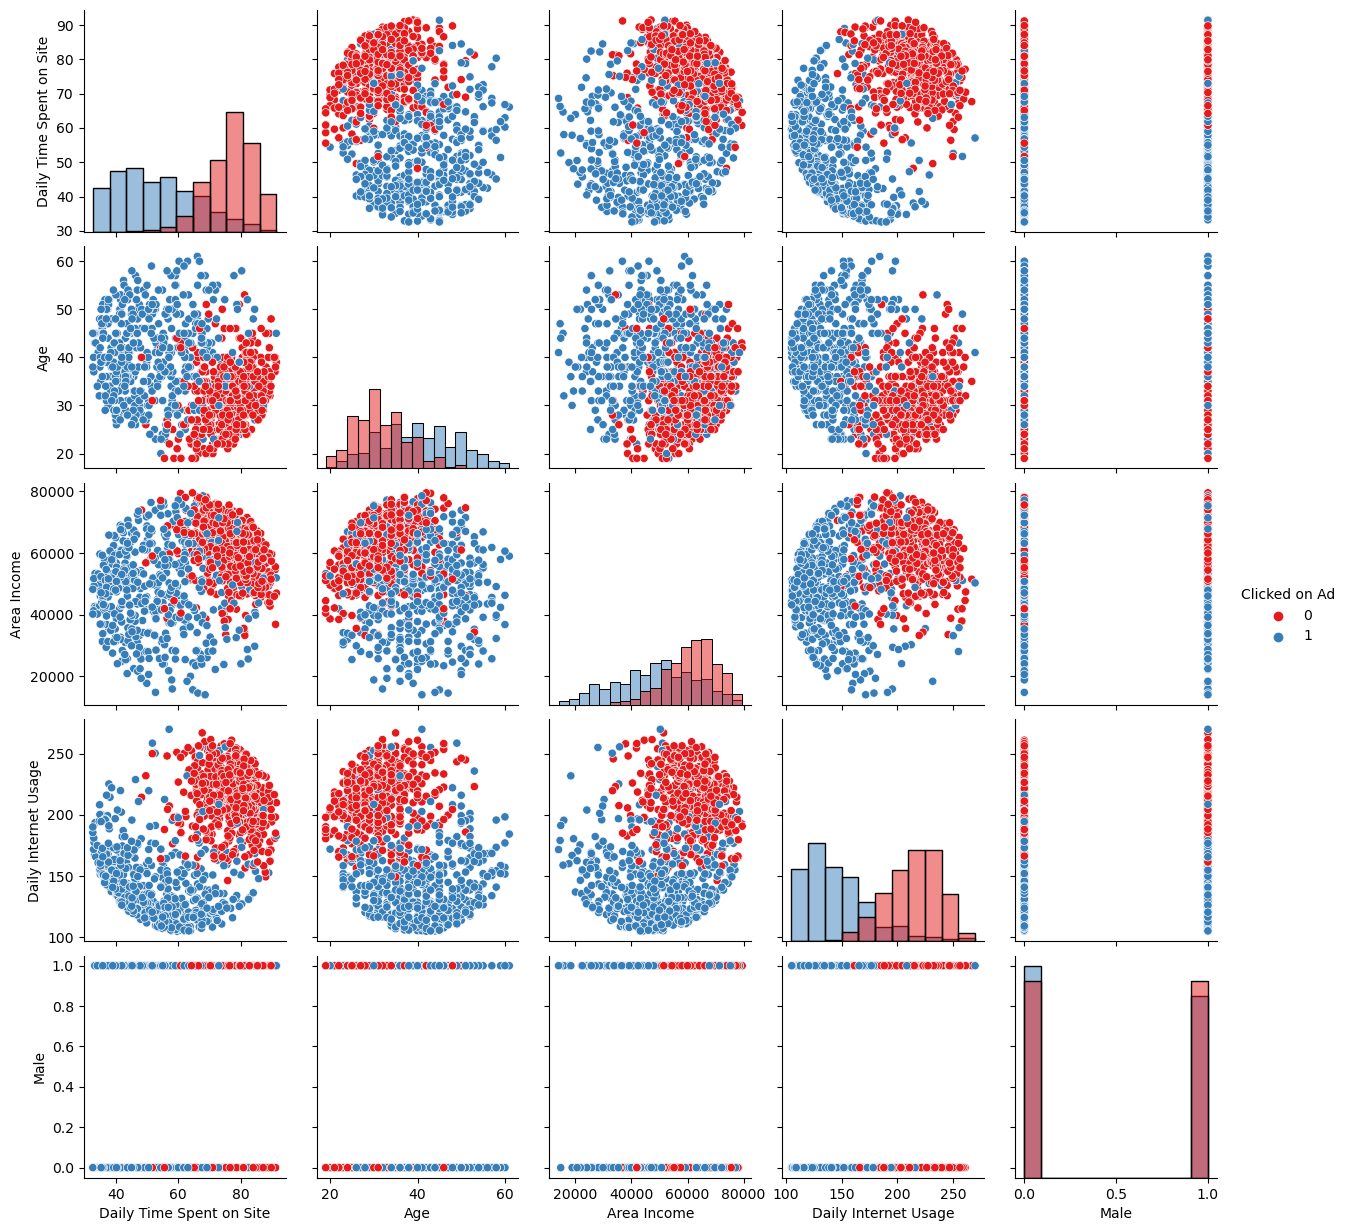

In [40]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', diag_kind='hist', palette='Set1')

In the above pairplot we can see the different relationships between features with who clicked on the Ad 

#### Deleting the columns that are not necessary

In [41]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [42]:
new_data = ad_data.drop(columns=['Ad Topic Line','City','Country','Timestamp'],axis=1)

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [52]:
new_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


## Logistic Regression

### Splitting the data into Training Set and Test Set

In [44]:
from sklearn.model_selection import train_test_split
X= new_data.iloc[:,:-1].values
y= new_data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [51]:
print(X_train)

[[ -0.5281241    0.1981716    0.49398676 115.91         0.        ]
 [ -1.63798195   0.1981716   -1.37473758 140.67         1.        ]
 [ -1.5174544   -0.36695654  -0.47903647 136.18         1.        ]
 ...
 [  1.65204349   0.98935101  -0.22898187 182.65         1.        ]
 [ -0.5268686    0.65027412   1.31351945 139.42         0.        ]
 [  1.56039234   0.42422286   0.34103109 194.23         0.        ]]


#### Train and fit the logistic regression model on the training set

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

## Feature Scaling

### Predictions and Evaluations

In [54]:
y_pred = lr.predict(X_test)

In [55]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]

Here we can compare the actual values to the predicted values of y

### Creating a Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[115   5]
 [  6 124]]


0.956

Here we created a confusion matrix and we can see that there are 117 True positives, 105 False Negatives and an accuracy of 88.8%

#### We can also use the below method for checking the Precision, Recall, Accuracy

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       120
           1       0.00      0.00      0.00       130

    accuracy                           0.48       250
   macro avg       0.24      0.50      0.32       250
weighted avg       0.23      0.48      0.31       250



/Users/dara/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dara/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dara/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10, criterion='entropy')
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [24]:
print('Score of train data = ', round(RFC.score(X_train, y_train), 4))
print('Score of test data = ', round(RFC.score(X_test, y_test), 4))

Score of train data =  1.0
Score of test data =  0.944
